# Early Diagnosis of Parkinsons Disease

### Using Apriori and Clustering Based Feature Selection on Ensembe Techniques

## Data Preprocessing


#### Imports


In [18]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

## Classifiers Imports

import time
import warnings
import lightgbm as lgb
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.combine import SMOTETomek
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

## Feature Selction Imports

from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from mlxtend.frequent_patterns import apriori, association_rules

## Metrics Imports

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_curve,auc, roc_auc_score

#### Data

In [19]:
data = pd.read_csv("parkinsons.csv")

# Selecting all the features except status
X = data.iloc[:,:-1]
y = data["status"]

In [20]:
X

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [22]:
y.value_counts()

1    147
0     48
Name: status, dtype: int64

In [23]:
data.shape

(195, 24)

In [24]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [25]:
# Dropping the name column
data = data.drop('name',axis=1)
X = data.iloc[:,:-1]
y = data["status"]

In [26]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


#### Data Visualisation

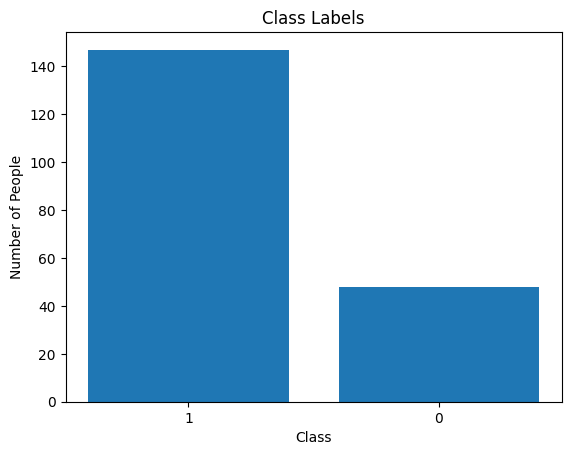

In [27]:
## Pie Chart for visualising Class Labels

cat=['1','0']
lab=[147,48]
plt.bar(cat,lab)
plt.title("Class Labels")
plt.xlabel("Class")
plt.ylabel("Number of People")
plt.show()


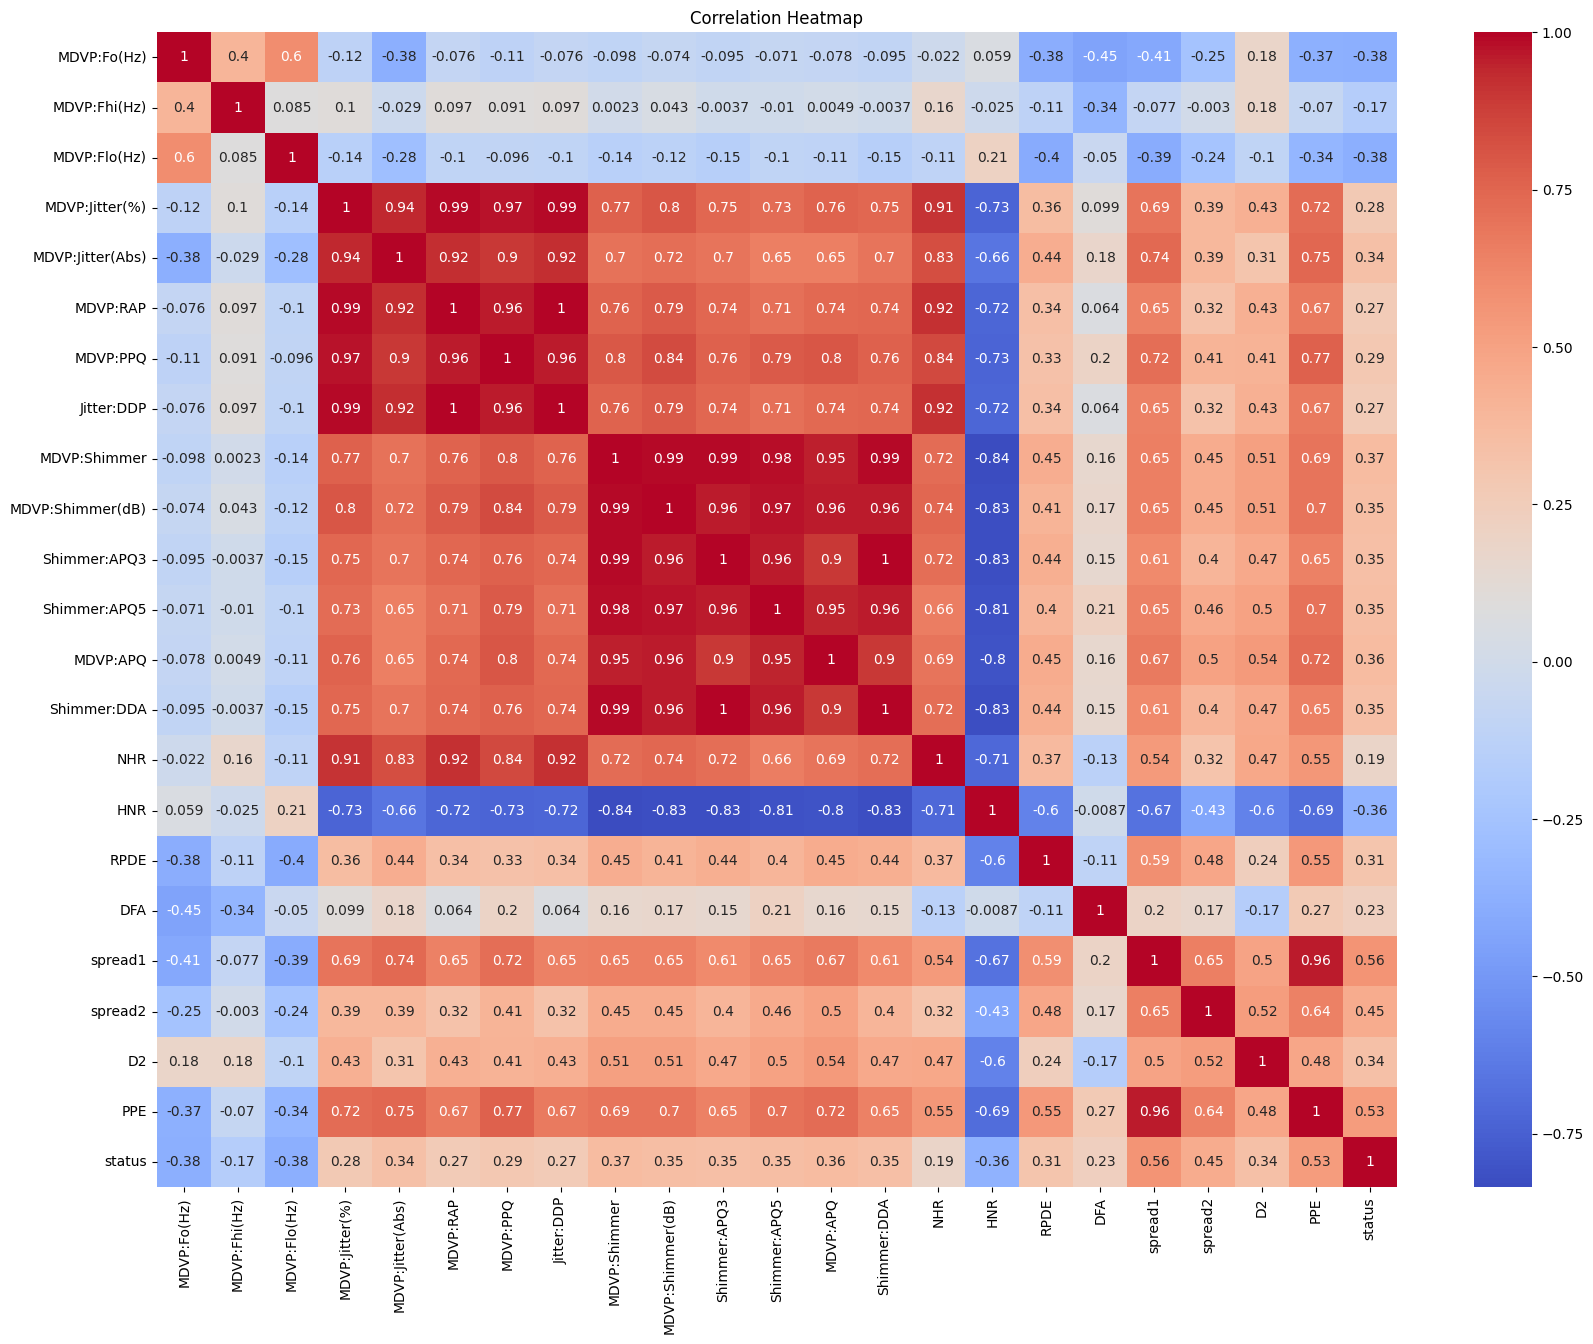

In [28]:
## Heatmap

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Balancing Data Using SMOTE

In [29]:
smote = SMOTETomek()
X_samp,y_samp=smote.fit_resample(X,y)
y_samp.value_counts()

1    144
0    144
Name: status, dtype: int64

In [30]:
X_samp=pd.DataFrame(X_samp)
y_samp=pd.DataFrame(y_samp)
class_label=y_samp["status"]

In [31]:
print("Shape of X before resampling: ", X.shape)
print("Shape of X after resampling: ", X_samp.shape)
print("Shape of y before resampling: ", y.shape)
print("Shape of y after resampling: ", y_samp.shape)

Shape of X before resampling:  (195, 22)
Shape of X after resampling:  (288, 22)
Shape of y before resampling:  (195,)
Shape of y after resampling:  (288, 1)


In [32]:
data_samp=pd.concat([X_samp,y_samp],axis=1)
data_samp

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992000,157.302000,74.997000,0.007840,0.00007,0.003700,0.005540,0.011090,0.043740,0.426000,...,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400000,148.650000,113.819000,0.009680,0.00008,0.004650,0.006960,0.013940,0.061340,0.626000,...,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682000,131.111000,111.555000,0.010500,0.00009,0.005440,0.007810,0.016330,0.052330,0.482000,...,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676000,137.871000,111.366000,0.009970,0.00009,0.005020,0.006980,0.015050,0.054920,0.517000,...,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014000,141.781000,110.655000,0.012840,0.00011,0.006550,0.009080,0.019660,0.064250,0.584000,...,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,201.801944,262.611402,78.346113,0.006924,0.00003,0.004110,0.003951,0.012320,0.025713,0.254678,...,0.043575,0.044275,19.391455,0.507847,0.683742,-6.934876,0.159538,2.316894,0.112795,0
284,116.760447,155.600591,98.925721,0.003398,0.00003,0.001618,0.002092,0.004856,0.016255,0.141947,...,0.024252,0.006399,25.022343,0.459067,0.721831,-5.870099,0.196944,1.935941,0.180495,0
285,199.335455,209.562604,192.264822,0.002389,0.00001,0.001326,0.001369,0.003978,0.010236,0.089865,...,0.015248,0.001655,30.978061,0.428201,0.742088,-7.687157,0.173168,2.119636,0.067978,0
286,215.891374,224.744950,202.386293,0.002367,0.00001,0.001327,0.001313,0.003991,0.014149,0.125019,...,0.022027,0.002484,28.250720,0.356609,0.710217,-7.298892,0.118406,1.993825,0.083681,0


In [33]:
def metrics(y_true, y_pred_prob, threshold=0.5):
 
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Other metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    # Sensitivity (Recall) and Specificity
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall (Sensitivity):", rec)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Confusion Matrix:")
    print(cm)


### Before FS

In [34]:
import re
features = X.columns
def remove_non_alphanumeric(s):
    return re.sub(r'\W+', '', s)

# Remove non-alphanumeric characters from each feature name
cleaned_feature_names = [remove_non_alphanumeric(name) for name in features]
X.columns=cleaned_feature_names

In [35]:
warnings.filterwarnings("ignore")
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)
s = time.time()
best_lgb_classifier = lgb.LGBMClassifier()

best_lgb_classifier.fit(x_train, y_train)

y_pred = best_lgb_classifier.predict(x_test)

e = time.time()


metrics(y_test,y_pred)

[LightGBM] [Info] Number of positive: 107, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 136, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.786765 -> initscore=1.305533
[LightGBM] [Info] Start training from score 1.305533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [36]:
class CustomEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.array([model.predict_proba(X) for model in self.models])
        if self.weights:
            avg_predictions = np.average(predictions, axis=0, weights=self.weights)
        else:
            avg_predictions = np.mean(predictions, axis=0)
        return np.argmax(avg_predictions, axis=1)

    def predict_proba(self, X):
        predictions = np.array([model.predict_proba(X) for model in self.models])
        if self.weights:
            avg_predictions = np.average(predictions, axis=0, weights=self.weights)
        else:
            avg_predictions = np.mean(predictions, axis=0)
        return avg_predictions


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()

custom_ensemble = CustomEnsembleClassifier(models=[rf, xgb, gbc, svc, knn], weights=[1, 1, 1, 1, 1])

custom_ensemble.fit(X_train, y_train)

y_pred = custom_ensemble.predict(X_test)

metrics(y_test,y_pred)


Accuracy: 0.847457627118644
Precision: 0.8444444444444444
Recall (Sensitivity): 0.95
F1 Score: 0.8941176470588236
Specificity: 0.631578947368421
Confusion Matrix:
[[12  7]
 [ 2 38]]


In [37]:
class StackingEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X, y):
        self.base_models_ = [list() for _ in self.base_models]
        for i, model in enumerate(self.base_models):
            cloned_model = clone(model)
            cloned_model.fit(X, y)
            self.base_models_[i].append(cloned_model)

        meta_features = self._predict_base_models(X)
        self.meta_model_ = clone(self.meta_model)
        self.meta_model_.fit(meta_features, y)
        return self

    def _predict_base_models(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_
        ])
        return meta_features

    def predict(self, X):
        meta_features = self._predict_base_models(X)
        return self.meta_model_.predict(meta_features)

    def predict_proba(self, X):
        meta_features = self._predict_base_models(X)
        return self.meta_model_.predict_proba(meta_features)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier()

meta_model = LogisticRegression(random_state=42)

stacking_ensemble = StackingEnsembleClassifier(base_models=[rf, xgb, svm, gb, knn], meta_model=meta_model)

stacking_ensemble.fit(X_train, y_train)
y_pred = stacking_ensemble.predict(X_test)

metrics(y_test,y_pred)

Accuracy: 0.8305084745762712
Precision: 0.8409090909090909
Recall (Sensitivity): 0.925
F1 Score: 0.8809523809523809
Specificity: 0.631578947368421
Confusion Matrix:
[[12  7]
 [ 3 37]]


## Feature Selection Using Apriori And Clustering Methods

### Clustering Methods

### Apriori Method

In [38]:

discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
data_samp[data_samp.columns[:-1]] = discretizer.fit_transform(data_samp[data_samp.columns[:-1]])
data_samp = pd.get_dummies(data_samp)
frequent_itemsets = apriori(data_samp, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
important_features = set()
for itemset in frequent_itemsets['itemsets']:
    for item in itemset:
        important_features.add(item)

print(important_features)


{'status', 'DFA', 'D2', 'PPE', 'MDVP:Flo(Hz)', 'HNR', 'MDVP:Fo(Hz)', 'RPDE', 'spread2', 'spread1'}


##### KMeans Clsutering

In [39]:
def corr(feature_clusters,threshold, top_percent):
    selected_features=[]
    for cluster in feature_clusters.values():
        cluster_indices = np.concatenate(cluster, axis=0)
        cluster_indices = np.unique(cluster_indices)

        if len(cluster_indices) > 1:
            cluster_data = X.iloc[:, cluster_indices]
            cluster_corr = cluster_data.corr().abs()
            upper = cluster_corr.where(np.triu(np.ones(cluster_corr.shape), k=1).astype(bool))

            to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
            selected_features.extend([f for f in cluster_indices if f not in to_drop])
        else:
            selected_features.extend(cluster_indices)

    selected_features = list(map(int, selected_features))  

    mi = mutual_info_classif(X.iloc[:, selected_features], y)
    feature_importance = pd.DataFrame({
        'feature': X.columns[selected_features],
        'importance': mi
    }).sort_values(by='importance', ascending=False)

    top_n = int(len(feature_importance) * top_percent)
    return feature_importance.head(top_n)['feature'].tolist()


In [40]:
def kmeans(data, k, threshold=0.1, top_percent=0.7):
    X = data.iloc[:,:-1]
    y = data["status"]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled.T) 
    cluster_labels = kmeans.labels_

    unique_labels = np.unique(cluster_labels)
    selected_features = []

    for label in unique_labels:
        cluster_features = [i for i, l in enumerate(cluster_labels) if l == label]
        if len(cluster_features) > 1:
            cluster_data = X.iloc[:, cluster_features]
            cluster_corr = cluster_data.corr().abs()
            upper = cluster_corr.where(np.triu(np.ones(cluster_corr.shape), k=1).astype(bool))

            to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
            selected_features.extend([f for f in cluster_features if f not in to_drop])
        else:
            selected_features.extend(cluster_features)

    mi = mutual_info_classif(X.iloc[:, selected_features], y)
    feature_importance = pd.DataFrame({
        'feature': X.columns[selected_features],
        'importance': mi
    }).sort_values(by='importance', ascending=False)

    top_n = int(len(feature_importance) * top_percent)
    top_features = feature_importance.head(top_n)['feature'].tolist()

    return top_features


##### Self Organising Maps Clustering

In [41]:
def som(data, som_grid_size, threshold=0.1, top_percent=0.7):
    X = data.iloc[:,:-1]
    y = data["status"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    som = MiniSom(som_grid_size, som_grid_size, X_scaled.shape[1], sigma=0.5, learning_rate=0.2, random_seed=42)
    som.train_random(X_scaled, 1000)
    feature_clusters = som.win_map(X_scaled)
    top_features=corr(feature_clusters,threshold, top_percent)    
    return top_features


### Classifiers

In [42]:
selected=kmeans(data_samp,5)
X_samp_selected=X_samp[selected]

In [43]:
X_samp_selected

,spread1,MDVP:Fo(Hz),MDVP:Shimmer,MDVP:Flo(Hz),spread2,HNR,PPE,DFA,D2,RPDE,MDVP:Jitter(%),NHR,MDVP:APQ,Shimmer:APQ5,MDVP:Fhi(Hz)
0,-4.813031,119.992000,0.043740,74.997000,0.266482,21.033000,0.284654,0.815285,2.301442,0.414783,0.007840,0.022110,0.029710,0.031300,157.302000
1,-4.075192,122.400000,0.061340,113.819000,0.335590,19.085000,0.368674,0.819521,2.486855,0.458359,0.009680,0.019290,0.043680,0.045180,148.650000
2,-4.443179,116.682000,0.052330,111.555000,0.311173,20.651000,0.332634,0.825288,2.342259,0.429895,0.010500,0.013090,0.035900,0.038580,131.111000
3,-4.117501,116.676000,0.054920,111.366000,0.334147,20.644000,0.368975,0.819235,2.405554,0.434969,0.009970,0.013530,0.037720,0.040050,137.871000
4,-3.747787,116.014000,0.064250,110.655000,0.234513,19.649000,0.410335,0.823484,2.332180,0.417356,0.012840,0.017670,0.044650,0.048250,141.781000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-6.934876,201.801944,0.025713,78.346113,0.159538,19.391455,0.112795,0.683742,2.316894,0.507847,0.006924,0.044275,0.017566,0.015808,262.611402
284,-5.870099,116.760447,0.016255,98.925721,0.196944,25.022343,0.180495,0.721831,1.935941,0.459067,0.003398,0.006399,0.014445,0.010376,155.600591
285,-7.687157,199.335455,0.010236,192.264822,0.173168,30.978061,0.067978,0.742088,2.119636,0.428201,0.002389,0.001655,0.007714,0.006467,209.562604
286,-7.298892,215.891374,0.014149,202.386293,0.118406,28.250720,0.083681,0.710217,1.993825,0.356609,0.002367,0.002484,0.010422,0.009422,224.744950


In [44]:
import re
features = X_samp_selected.columns
def remove_non_alphanumeric(s):
    return re.sub(r'\W+', '', s)

# Remove non-alphanumeric characters from each feature name
cleaned_feature_names = [remove_non_alphanumeric(name) for name in features]
X_samp_selected.columns = cleaned_feature_names
X_samp_selected.columns

Index(['spread1', 'MDVPFoHz', 'MDVPShimmer', 'MDVPFloHz', 'spread2', 'HNR',
       'PPE', 'DFA', 'D2', 'RPDE', 'MDVPJitter', 'NHR', 'MDVPAPQ',
       'ShimmerAPQ5', 'MDVPFhiHz'],
      dtype='object')

In [45]:
warnings.filterwarnings("ignore")
x_train , x_test , y_train , y_test = train_test_split(X_samp_selected, y_samp, test_size = 0.3, random_state = 45)
s = time.time()
best_lgb_classifier = lgb.LGBMClassifier()


best_lgb_classifier.fit(x_train, y_train)
y_pred = best_lgb_classifier.predict(x_test)

metrics(y_test,y_pred)

[LightGBM] [Info] Number of positive: 99, number of negative: 102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 201, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492537 -> initscore=-0.029853
[LightGBM] [Info] Start training from score -0.029853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [59]:
selected_som=kmeans(data_samp,10)
X_samp_selected=X_samp[selected_som]

import re
features = X_samp_selected.columns
def remove_non_alphanumeric(s):
    return re.sub(r'\W+', '', s)

# Remove non-alphanumeric characters from each feature name
cleaned_feature_names = [remove_non_alphanumeric(name) for name in features]
X_samp_selected.columns = cleaned_feature_names
X_samp_selected.columns
warnings.filterwarnings("ignore")
x_train , x_test , y_train , y_test = train_test_split(X_samp_selected, y_samp, test_size = 0.3, random_state = 45)
s = time.time()
best_lgb_classifier = lgb.LGBMClassifier()


best_lgb_classifier.fit(x_train, y_train)
y_pred = best_lgb_classifier.predict(x_test)

metrics(y_test,y_pred)

[LightGBM] [Info] Number of positive: 99, number of negative: 102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 201, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492537 -> initscore=-0.029853
[LightGBM] [Info] Start training from score -0.029853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [48]:
class CustomEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.array([model.predict_proba(X) for model in self.models])
        if self.weights:
            avg_predictions = np.average(predictions, axis=0, weights=self.weights)
        else:
            avg_predictions = np.mean(predictions, axis=0)
        return np.argmax(avg_predictions, axis=1)

    def predict_proba(self, X):
        predictions = np.array([model.predict_proba(X) for model in self.models])
        if self.weights:
            avg_predictions = np.average(predictions, axis=0, weights=self.weights)
        else:
            avg_predictions = np.mean(predictions, axis=0)
        return avg_predictions


important_features = list(set(important_features))

X = data_samp[important_features]
y = data_samp['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()

custom_ensemble = CustomEnsembleClassifier(models=[rf, xgb, gbc, svc, knn], weights=[1, 1, 1, 1, 1])

custom_ensemble.fit(X_train, y_train)

y_pred = custom_ensemble.predict(X_test)

metrics(y_test,y_pred)


Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F1 Score: 1.0
Specificity: 1.0
Confusion Matrix:
[[42  0]
 [ 0 45]]


In [50]:
class StackingEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X, y):
        self.base_models_ = [list() for _ in self.base_models]
        for i, model in enumerate(self.base_models):
            cloned_model = clone(model)
            cloned_model.fit(X, y)
            self.base_models_[i].append(cloned_model)

        meta_features = self._predict_base_models(X)
        self.meta_model_ = clone(self.meta_model)
        self.meta_model_.fit(meta_features, y)
        return self

    def _predict_base_models(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_
        ])
        return meta_features

    def predict(self, X):
        meta_features = self._predict_base_models(X)
        return self.meta_model_.predict(meta_features)

    def predict_proba(self, X):
        meta_features = self._predict_base_models(X)
        return self.meta_model_.predict_proba(meta_features)



important_features = list(set(important_features))

X = data_samp[important_features]
y = data_samp['status']

if X.isnull().values.any():
    raise ValueError("Error: NaNs present in the feature matrix X!")

if not all(np.issubdtype(dtype, np.number) for dtype in X.dtypes):
    raise ValueError("Error: Non-numeric values present in the feature matrix X!")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier()

meta_model = LogisticRegression(random_state=42)

stacking_ensemble = StackingEnsembleClassifier(base_models=[rf, xgb, svm, gb, knn], meta_model=meta_model)

stacking_ensemble.fit(X_train, y_train)


y_pred = stacking_ensemble.predict(X_test)

metrics(y_test,y_pred)

Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F1 Score: 1.0
Specificity: 1.0
Confusion Matrix:
[[42  0]
 [ 0 45]]


In [52]:
import lime
import lime.lime_tabular

In [53]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=important_features,
    class_names=['Parkinsons', 'Healthy'],  # Adjust based on your class names
    mode='classification'
)

# Explain a single prediction
index = 42 # Index of the instance to explain
exp = explainer.explain_instance(
    data_row=X_test.iloc[index],
    predict_fn=custom_ensemble.predict_proba
)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)